# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
col_name = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
pima = pd.read_csv('data/diabetes.csv',names = col_name)

In [8]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [13]:
#pima = pima.drop(pima.index[0])
pima = pima[pima.pregnant != 'Pregnancies']

In [14]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [58]:
feature_cols = ['pregnant','glucose','bp','insulin','bmi','pedigree','age']

X = pima[feature_cols]      # features
y = pima.label              # target(label)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

logreg.coef_, logreg.intercept_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([[ 1.06582318e-01,  2.85624533e-02, -1.97046017e-02,
         -1.67617440e-04,  5.62678496e-02,  6.23222806e-01,
          2.77540292e-03]]), array([-5.31389198]))

Text(0.5, 15.0, 'predicted label')

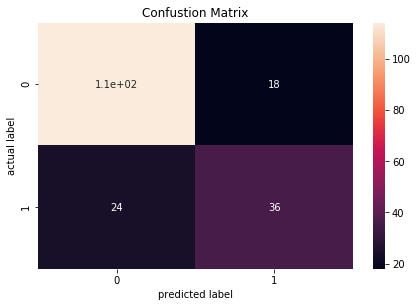

In [59]:
y_pred = logreg.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)


import seaborn as sns
class_names = [0,1]
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)

plt.tight_layout()
plt.title('Confustion Matrix',y=1.1)
plt.ylabel('actual label')
plt.xlabel('predicted label')

In [60]:
print('accuracy : ', metrics.accuracy_score(y_test,y_pred))
print('precistion : ', metrics.precision_score(y_test, y_pred, pos_label = '1'))
print('recall : ', metrics.recall_score(y_test,y_pred, pos_label='1'))

accuracy :  0.78125
precistion :  0.6666666666666666
recall :  0.6


In [61]:
# ROC curve

y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba = y_pred_proba[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba, pos_label = '1')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.8241161616161616

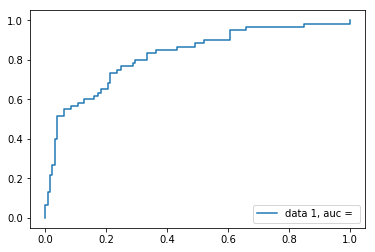

In [62]:
plt.plot(fpr,tpr,label = 'data 1, auc = ')
plt.legend(loc=4)
plt.show()

In [65]:
result = pd.DataFrame(y_pred, columns = ['predict'])
result['real'] = np.array(y_test)
result['correct'] = (result.predict == result.real)
result['score'] = y_pred_proba
result

,predict,real,correct,score
0,0,1,False,0.327952
1,0,1,False,0.477941
2,0,1,False,0.247821
3,0,0,True,0.276867
4,1,1,True,0.635120
5,0,0,True,0.054040
6,0,0,True,0.160431
7,0,0,True,0.073475
8,1,0,False,0.550846
9,1,1,True,0.867569
